In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Data
column_names=['name','F_number','label','HeightWidthRatio', 'MajorMinorRatio', 'BoundingBoxOccupancy', 'MaxStdXZ', 'HHmaxRatio', 'H', 'D', 'P40']
fall_data = pd.read_csv('C:/Users/Dhia/Desktop/travail csv/grand csv/urfall-cam0-adls.csv')
fall_data.columns=column_names
adl_data = pd.read_csv('C:/Users/Dhia/Desktop/travail csv/grand csv/urfall-cam0-falls.csv')
adl_data.columns=column_names
# Step 2: Preprocess the Data (if necessary)

# Step 3: Feature Selection/Extraction
# Select relevant features from the data
selected_features = ['HeightWidthRatio', 'MajorMinorRatio', 'BoundingBoxOccupancy', 'MaxStdXZ', 'HHmaxRatio', 'H', 'D', 'P40']

# Combine fall and ADL data
combined_data = pd.concat([fall_data, adl_data])

# Select features and labels
X = combined_data[selected_features]
y = combined_data['label']  # Assuming 'label' column indicates fall or non-fall

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-1    5977
 1    1868
 0    1388
Name: label, dtype: int64 9233 -1    0.514918
 1    1.647573
 0    2.217339
Name: label, dtype: float64 3
[-1  0  1] {-1: 0.5149182979198037, 0: 1.6475731620271235, 1: 2.2173390970220943}
Accuracy: 0.9519272412299696
y_test: [-1  1 -1 ... -1  1 -1]
              precision    recall  f1-score   support

          -1       0.96      0.99      0.98      1473
           0       0.91      0.74      0.82       331
           1       0.94      0.97      0.95       505

    accuracy                           0.95      2309
   macro avg       0.94      0.90      0.92      2309
weighted avg       0.95      0.95      0.95      2309

[[1463    9    1]
 [  54  245   32]
 [   0   15  490]]


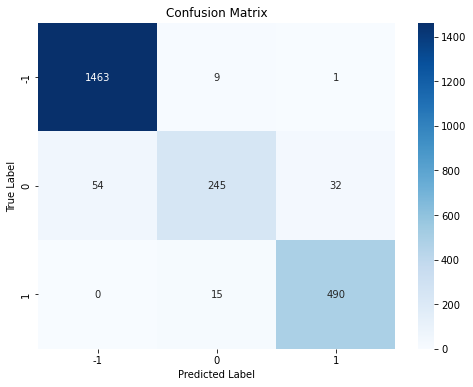

Feature Importance:
H: 0.18670052418813388
HHmaxRatio: 0.1834345062937138
HeightWidthRatio: 0.1704643631767948
D: 0.12563415329964947
MaxStdXZ: 0.11792656670046589
P40: 0.10814386721347576
MajorMinorRatio: 0.05535200494462457
BoundingBoxOccupancy: 0.05234401418314179
Number of misclassified samples: 111
Number of true labels: 111
Number of predicted labels: 111


In [16]:
# Step 5: Train a Classifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize and train a Random Forest classifier
from sklearn.utils.class_weight import compute_class_weight

# Convert negative labels to positive labels

# Calculate class weights manually
class_counts=y_train.value_counts()

total_samples = np.sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)
print(class_counts,total_samples,class_weights,(len(class_counts)))

# Create a dictionary mapping class labels to their respective weights
class_labels = np.unique(y_train)
class_weights_dict = dict(zip(class_labels, class_weights))
print(class_labels,class_weights_dict)
# Initialize and train a Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weights_dict)
rf_classifier.fit(X_train, y_train)





# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("y_test:", y_pred)

# Calculate other evaluation metrics
print(classification_report(y_test, y_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance scores
print("Feature Importance:")
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {feature_importances[idx]}")

# Plot misclassified samples
misclassified_samples = X_test[y_test != y_pred]
true_labels = y_test[y_test != y_pred]
predicted_labels = y_pred[y_test != y_pred]
print("Number of misclassified samples:", len(misclassified_samples))
print("Number of true labels:", len(true_labels))
print("Number of predicted labels:", len(predicted_labels))




# Step 7: Optimize and Tune (optional)
# Perform hyperparameter tuning to optimize the classifier

Accuracy: 0.9540926808142053
y_test: [-1  0 -1 ... -1  1 -1]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1473
           0       0.89      0.78      0.83       331
           1       0.94      0.97      0.96       505

    accuracy                           0.95      2309
   macro avg       0.93      0.91      0.92      2309
weighted avg       0.95      0.95      0.95      2309

[[1454   18    1]
 [  42  259   30]
 [   0   15  490]]


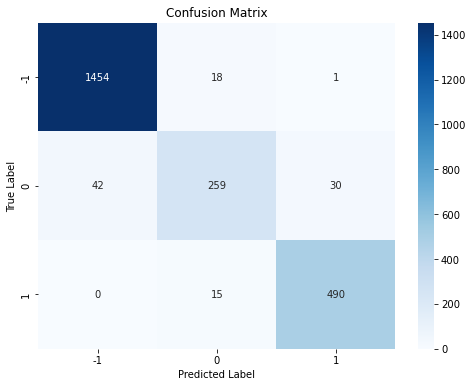

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomOverSampler for oversampling
oversampler = RandomOverSampler(random_state=42)

# Fit and apply the oversampling to the training data
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
#print(y_train_over,X_train_over)
# Initialize RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(random_state=42)

# Fit and apply the undersampling to the training data
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
#print(X_train_under,y_train_under)



# Initialize and train a Random Forest classifier with class weights
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_over, y_train_over)





# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("y_test:", y_pred)

# Calculate other evaluation metrics
print(classification_report(y_test, y_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()







Accuracy: 0.9545257687310524
y_test: [-1  0 -1 ... -1  1 -1]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1473
           0       0.88      0.79      0.83       331
           1       0.95      0.97      0.96       505

    accuracy                           0.95      2309
   macro avg       0.93      0.92      0.92      2309
weighted avg       0.95      0.95      0.95      2309

[[1452   20    1]
 [  42  263   26]
 [   0   16  489]]


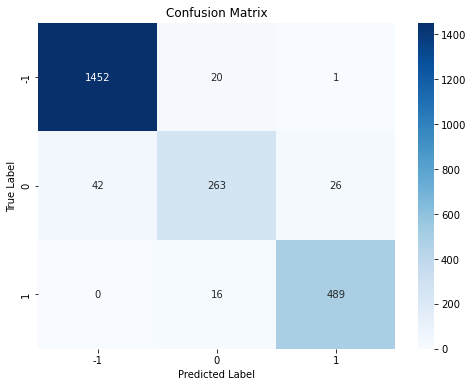

In [18]:
# cette cell
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomOverSampler for oversampling
oversampler = RandomOverSampler(random_state=42)

# Fit and apply the oversampling to the training data
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
# Initialize RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(random_state=42)

# Fit and apply the undersampling to the training data
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)




# Initialize and train a Random Forest classifier with class weights
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_over, y_train_over)





# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("y_test:", y_pred)

# Calculate other evaluation metrics
print(classification_report(y_test, y_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.9185794716327415
y_test: [-1  0 -1 ... -1  1 -1]
              precision    recall  f1-score   support

          -1       0.98      0.92      0.95      1473
           0       0.68      0.85      0.76       331
           1       0.94      0.96      0.95       505

    accuracy                           0.92      2309
   macro avg       0.87      0.91      0.89      2309
weighted avg       0.93      0.92      0.92      2309

[[1355  112    6]
 [  26  281   24]
 [   0   20  485]]


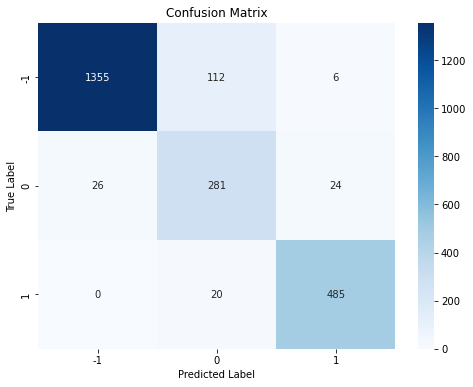

In [19]:
# Initialize and train a Random Forest classifier without class weights
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_under, y_train_under)


# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("y_test:", y_pred)

# Calculate other evaluation metrics
print(classification_report(y_test, y_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

-1    1388
 0    1388
 1    1388
Name: label, dtype: int64 4164 -1    1.0
 0    1.0
 1    1.0
Name: label, dtype: float64 3
Accuracy: 0.9190125595495886
y_test: [-1  0 -1 ... -1  1 -1]
              precision    recall  f1-score   support

          -1       0.98      0.92      0.95      1473
           0       0.68      0.84      0.75       331
           1       0.94      0.96      0.95       505

    accuracy                           0.92      2309
   macro avg       0.87      0.91      0.88      2309
weighted avg       0.93      0.92      0.92      2309

[[1361  106    6]
 [  26  278   27]
 [   0   22  483]]


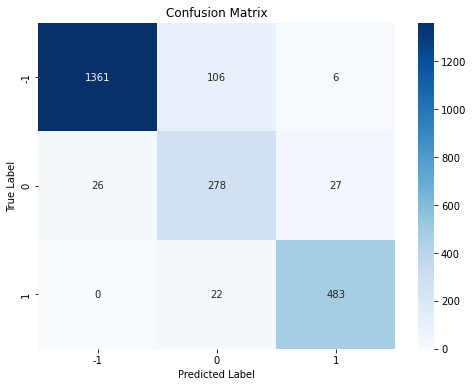

In [10]:
# Initialize and train a Random Forest classifier with class weights
class_counts=y_train_under.value_counts()
total_samples = np.sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)
print(class_counts,total_samples,class_weights,(len(class_counts)))

# Create a dictionary mapping class labels to their respective weights
class_labels = np.unique(y_train_over)
class_weights_dict_under = dict(zip(class_labels, class_weights))

# Initialize and train a Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weights_dict_under)
rf_classifier.fit(X_train_under, y_train_under)





# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("y_test:", y_pred)

# Calculate other evaluation metrics
print(classification_report(y_test, y_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


-1    5977
 1    5977
 0    5977
Name: label, dtype: int64 17931 -1    1.0
 1    1.0
 0    1.0
Name: label, dtype: float64 3
Accuracy: 0.956691208315288
y_test: [-1  0 -1 ... -1  1 -1]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1473
           0       0.90      0.79      0.84       331
           1       0.95      0.97      0.96       505

    accuracy                           0.96      2309
   macro avg       0.94      0.92      0.93      2309
weighted avg       0.96      0.96      0.96      2309

[[1455   17    1]
 [  43  262   26]
 [   0   13  492]]


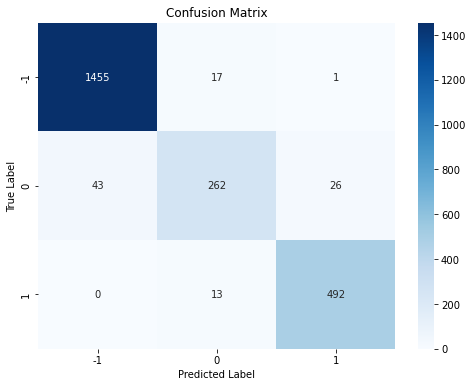

In [20]:
#cette cell
class_counts=y_train_over.value_counts()

total_samples = np.sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)
print(class_counts,total_samples,class_weights,(len(class_counts)))

# Create a dictionary mapping class labels to their respective weights
class_labels = np.unique(y_train_over)
class_weights_dict_over = dict(zip(class_labels, class_weights))


# Initialize and train a Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weights_dict_over)
rf_classifier.fit(X_train_over, y_train_over)





# Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("y_test:", y_pred)

# Calculate other evaluation metrics
print(classification_report(y_test, y_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20,25],
    'min_samples_split': [2,3, 5, 10]
}

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best estimator found
best_rf_classifier = grid_search.best_estimator_
print("\nBest estimator:", best_rf_classifier)

# Evaluate the model performance on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("\nTest accuracy:", test_accuracy)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Best estimator: RandomForestClassifier(n_estimators=200)

Test accuracy: 0.9532265049805111


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier()

# Train Gradient Boosting Classifier
gbm_classifier.fit(X_train, y_train)

# Make predictions using Gradient Boosting Classifier
gbm_predictions = gbm_classifier.predict(X_test)

# Evaluate Gradient Boosting Classifier
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
print("Gradient Boosting Classifier Accuracy:", gbm_accuracy)

# Initialize Support Vector Machine Classifier
svm_classifier = SVC()

# Train Support Vector Machine Classifier
svm_classifier.fit(X_train, y_train)

# Make predictions using Support Vector Machine Classifier
svm_predictions = svm_classifier.predict(X_test)

# Evaluate Support Vector Machine Classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)


Gradient Boosting Classifier Accuracy: 0.9285404937202252
Support Vector Machine Classifier Accuracy: 0.8705067128627111


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Get the best hyperparameters from grid search results
best_params = grid_search.best_params_

# Retrain the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Perform cross-validation with 5 folds
cv_scores1 = cross_val_score(best_rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores1)
print("Mean Accuracy:", np.mean(cv_scores1))

best_rf_model.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
# Make predictions using the retrained model
predictions = best_rf_model.predict(X_test)

# Make predictions using the retrained model
predictions1 = rf_classifier.predict(X_test)

# Evaluate the retrained model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with best hyperparameters:", accuracy)

# Evaluate the retrained model
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy with best hyperparameters:", accuracy1)

Cross-Validation Scores: [0.6738848  0.88566479 0.80329289 0.85615251 0.87435009]
Mean Accuracy: 0.8186690165001241
Cross-Validation Scores: [0.72152447 0.88090082 0.80155979 0.85008666 0.87391681]
Mean Accuracy: 0.8255977101133158
Accuracy with best hyperparameters: 0.9519272412299696
Accuracy with best hyperparameters: 0.9523603291468168
